In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import ast

In [2]:
path = r"C:\Users\juans\Documents\Data Science\Heladerias\b_limpieza\Cleaned_data.csv"
df = pd.read_csv(path)
df.head()

,Usuario,Rating,Fecha,Descripcion,Local,Marca,Descripcion_Procesada,Tokens,Lematizer,Sentimiento
0,Lucas RC,4,11/12/2024,Son un 10 los helados y la atención.\nAdemás e...,Emilio Lamarca 3683,Barilatte,son un los helados y la atención además el lu...,"['helados', 'atención', 'además', 'lugar', 'li...","['helado', 'atención', 'además', 'lugar', 'lin...",2
1,Paola Cabral,4,11/03/2024,"Local nuevo en alta cordoba, los helados se de...",Emilio Lamarca 3683,Barilatte,local nuevo en alta cordoba los helados se des...,"['local', 'nuevo', 'alta', 'cordoba', 'helados...","['local', 'nuevo', 'alto', 'cordoba', 'helado'...",0
2,Mica G,4,18/02/2025,"Helado muy rico, ame el macaron. Faltaba como ...",Emilio Lamarca 3683,Barilatte,helado muy rico ame el macaron faltaba como m...,"['helado', 'rico', 'ame', 'macaron', 'faltaba'...","['helado', 'rico', 'ame', 'macaron', 'faltar',...",2
3,Victor Altamirano,5,18/02/2025,"Los mejores helados de Córdoba, junto con la a...",Emilio Lamarca 3683,Barilatte,los mejores helados de córdoba junto con la at...,"['mejores', 'helados', 'córdoba', 'junto', 'at...","['mejor', 'helado', 'córdobo', 'junto', 'atenc...",2
4,María Dolores Ñáñez,5,06/03/2025,"Muy buena atención siempre, helados de buena ...",Emilio Lamarca 3683,Barilatte,muy buena atención siempre helados de buena c...,"['buena', 'atención', 'siempre', 'helados', 'b...","['buen', 'atención', 'siempre', 'helado', 'bue...",2


# Calificacion por marca

<Axes: ylabel='Marca'>

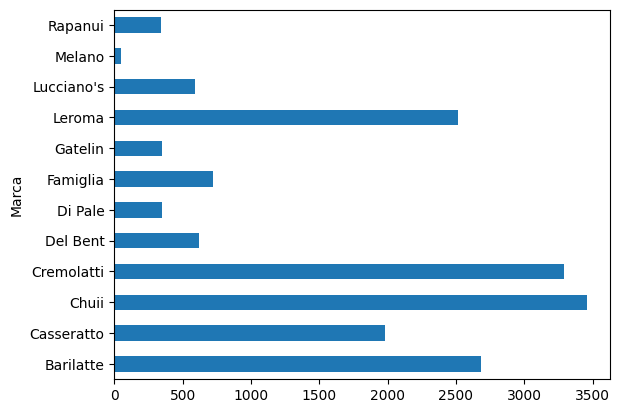

In [3]:
df.groupby("Marca")["Marca"].count().plot(kind="barh")

![image.png](attachment:image.png)

# Calificacion Historica Promedio

In [4]:
count_list = df.groupby("Marca")["Rating"].count().tolist()
rating_list = df.groupby("Marca")["Rating"].mean().tolist()
brands_list = df.groupby("Marca")["Marca"].count().index

data = pd.DataFrame(index=brands_list)
data["Ratings Mean"] = rating_list
data["Ratings Count"] = count_list

m = data["Ratings Count"].quantile(0.25)
global_mean  = df.Rating.mean()
weighted_strength  = global_mean  * m


data["Avg Bayesian"] = ((data["Ratings Mean"] * data["Ratings Count"]) + weighted_strength ) / (data["Ratings Count"] + m)
data["Avg Bayesian"].sort_values(ascending=False).round(3).to_frame()

,Avg Bayesian
Marca,
Leroma,4.612
Barilatte,4.429
Del Bent,4.405
Lucciano's,4.393
Famiglia,4.377
Chuii,4.348
Rapanui,4.348
Gatelin,4.330
Melano,4.298


# Calificacion Actual

In [10]:
data = df.copy()
data["Fecha"] = pd.to_datetime(data["Fecha"], format="%d/%m/%Y")
data["Año"] = data.Fecha.dt.year

#Agrupo por año y marca, calculando el promedio en cada año
result = data.groupby(["Año", "Marca"])["Rating"].mean().to_frame()
result.rename(columns={"Rating": "Rating Promedio"}, inplace=True)
result.reset_index("Marca", inplace=True)

# Filtro resultados
result.loc[result.index >=2025].sort_values("Rating Promedio", ascending=False).round(3)

,Marca,Rating Promedio
Año,,
2025,Leroma,4.712
2025,Lucciano's,4.693
2025,Barilatte,4.482
2025,Melano,4.471
2025,Del Bent,4.458
2025,Rapanui,4.447
2025,Chuii,4.320
2025,Famiglia,4.312
2025,Casseratto,4.057


# Variacion Calificatoria Durante el Tiempo

In [9]:
data

,Marca,Rating Promedio
Año,,
2016,Barilatte,5.000000
2017,Barilatte,4.250000
2018,Barilatte,4.186813
2019,Barilatte,4.398734
2020,Barilatte,4.161435
2021,Barilatte,4.278261
2022,Barilatte,4.519637
2023,Barilatte,4.474576
2024,Barilatte,4.504417


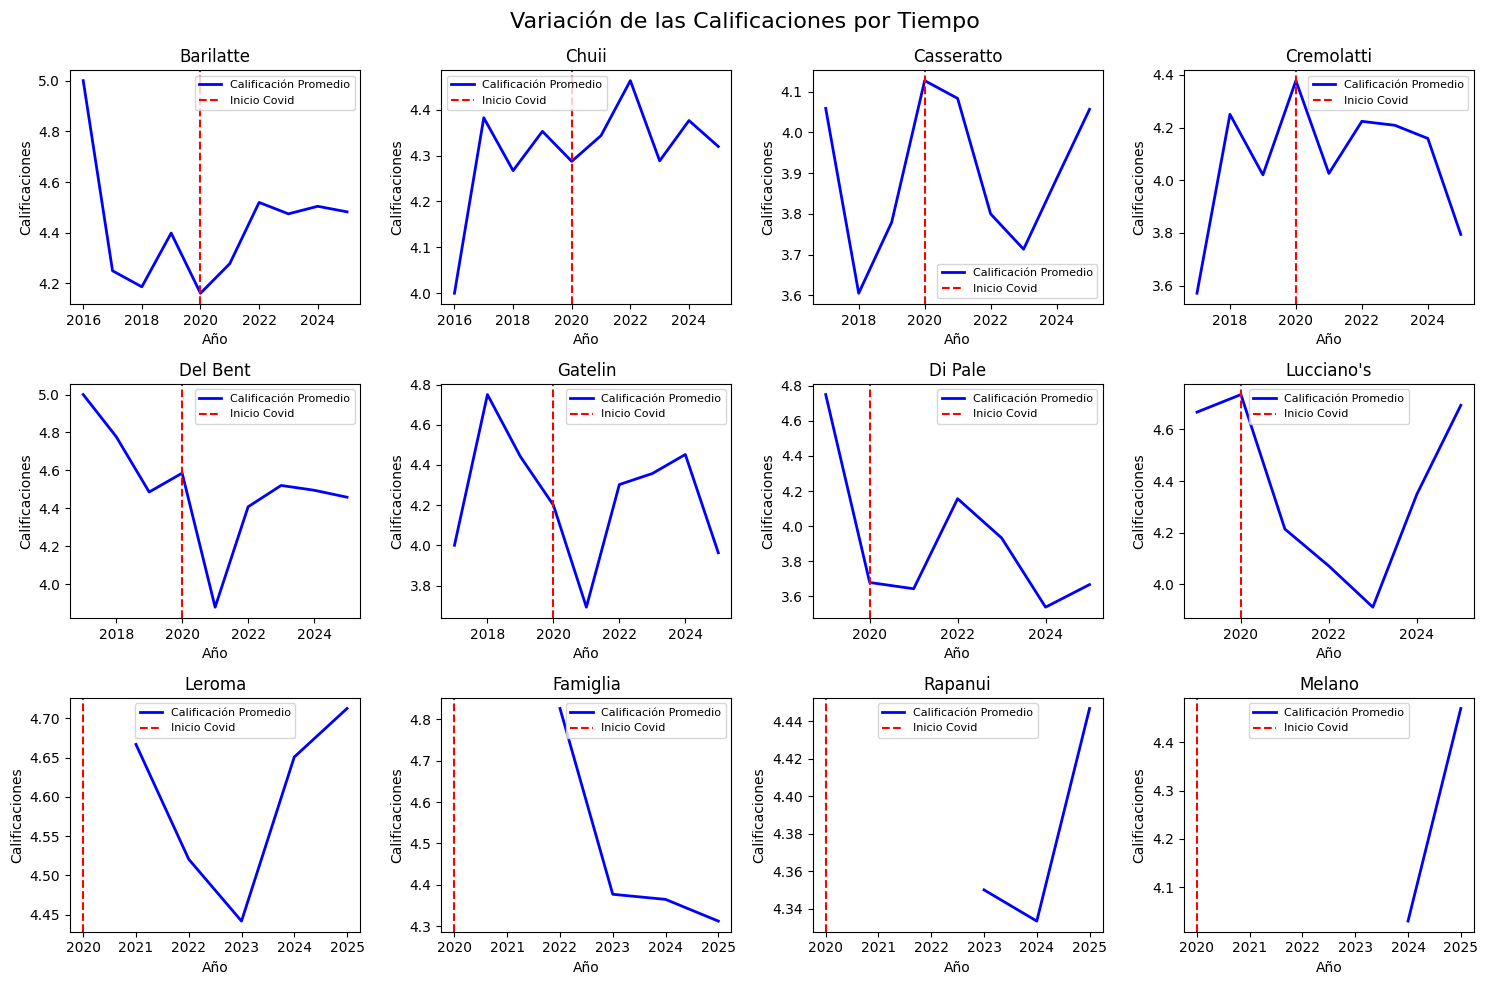

In [20]:
# Configurar la grilla de subplots (3 filas, 4 columnas)
fig, axs = plt.subplots(3, 4, figsize=(15, 10))
fig.suptitle("Variación de las Calificaciones por Tiempo", fontsize=16)

# Lista de marcas
marcas = result.Marca.unique()

# Iterar sobre las marcas y los subplots
for idx, marca in enumerate(marcas):
    fila = idx // 4  # División entera para filas (0, 1, 2)
    col = idx % 4    # Módulo para columnas (0, 1, 2, 3)
    
    # Graficar la línea de calificaciones promedio
    data = result[result.Marca == marca].copy()
    sns.lineplot(data=data, x="Año", y="Rating Promedio", 
                 ax=axs[fila, col], linewidth=2, label="Calificación Promedio", color="blue")
    
    # Agregar la línea vertical para el inicio de Covid
    axs[fila, col].axvline(x=2020, color='red', linestyle='--', linewidth=1.5, label='Inicio Covid')

    # Configurar títulos y etiquetas
    axs[fila, col].set_title(marca, fontsize=12)
    axs[fila, col].set_xlabel("Año", fontsize=10)
    axs[fila, col].set_ylabel("Calificaciones", fontsize=10)
    
    # Mostrar la leyenda
    axs[fila, col].legend(fontsize=8)

# Ajustar el layout para evitar superposiciones
plt.tight_layout()
plt.subplots_adjust(top=0.92)  # Para que el título general no se superponga
plt.show()

# Sucursales por Marca

In [25]:
data = df.copy()
data["Fecha"] = pd.to_datetime(data["Fecha"], format="%d/%m/%Y")
data["Año"] = data.Fecha.dt.year

<Axes: ylabel='Marca'>

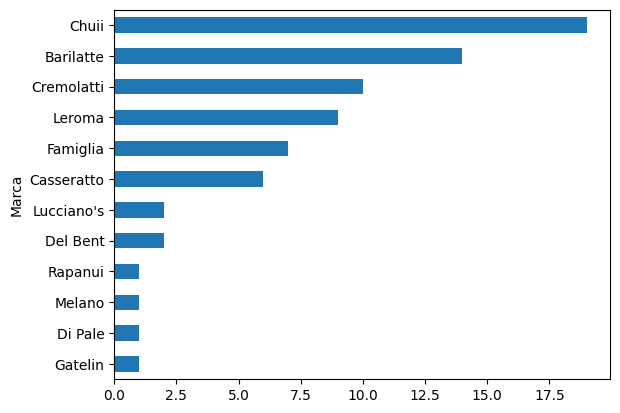

In [26]:
amount_stores = data.groupby("Marca")["Local"].nunique()
amount_stores.sort_values(ascending=True).plot(kind="barh")

# Cantidad de Locales Atraves del Tiempo

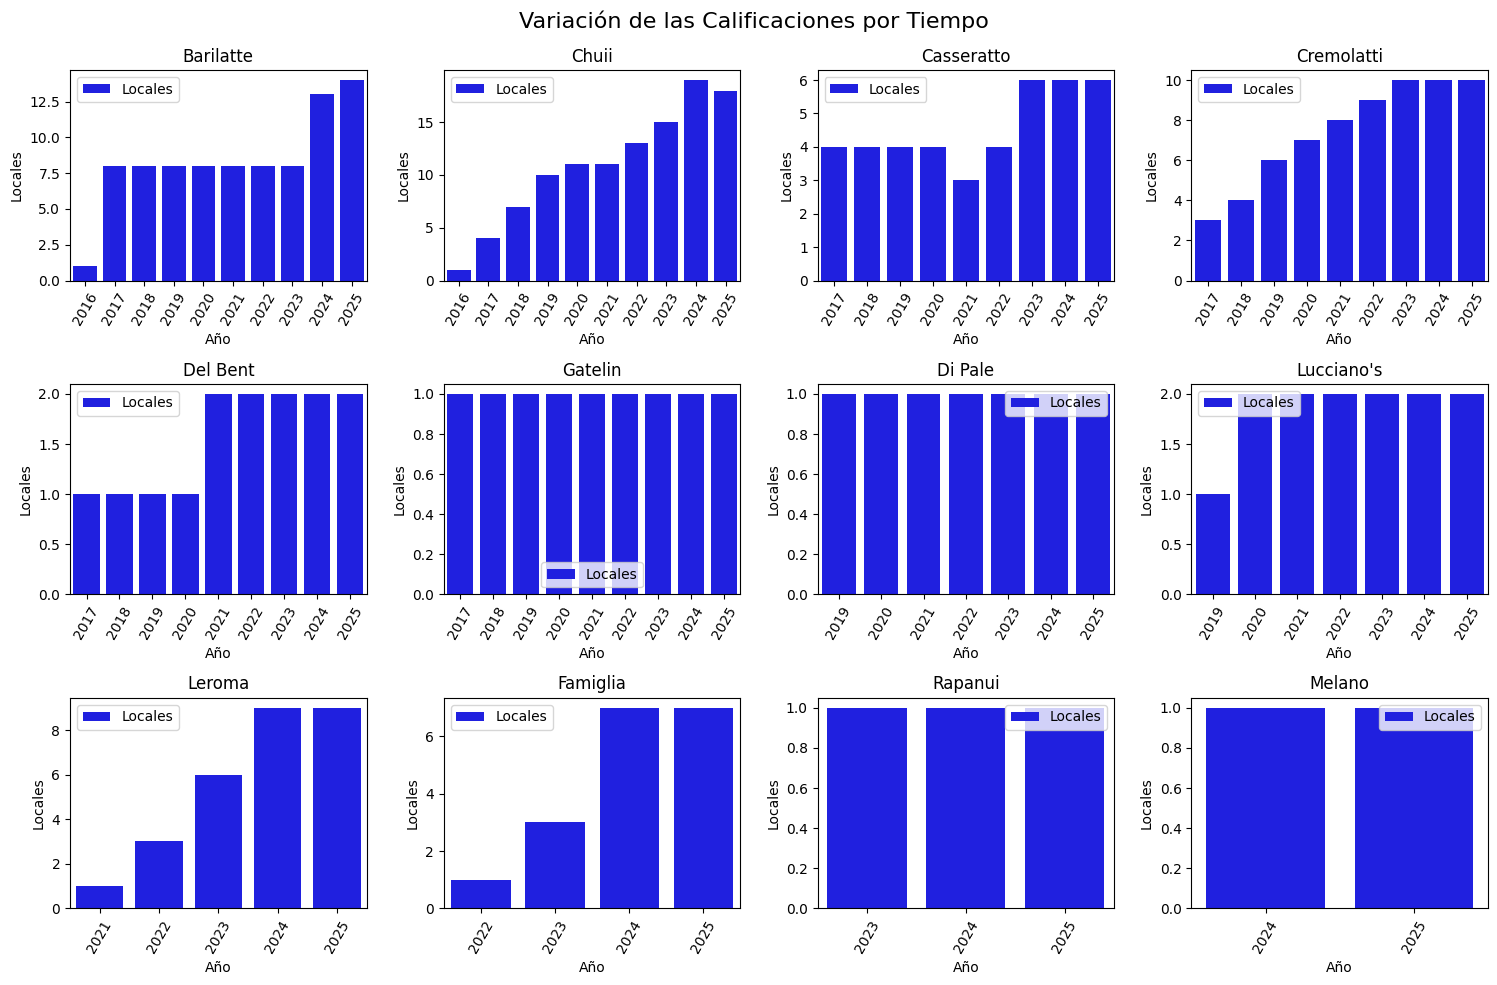

In [27]:
store_by_year = data.groupby(["Año", "Marca"])["Local"].nunique().to_frame().reset_index("Marca")
# Configurar la grilla de subplots (3 filas, 4 columnas)
fig, axs = plt.subplots(3, 4, figsize=(15, 10))
fig.suptitle("Variación de las Calificaciones por Tiempo", fontsize=16)

# Lista de marcas
marcas = store_by_year.Marca.unique()

# Iterar sobre las marcas y los subplots
for idx, marca in enumerate(marcas):
    fila = idx // 4  # División entera para filas (0, 1, 2)
    col = idx % 4    # Módulo para columnas (0, 1, 2, 3)
    
    # Graficar la línea de calificaciones promedio
    sns.barplot(data=store_by_year[store_by_year.Marca == marca], x="Año", y="Local", 
                 ax=axs[fila, col], linewidth=2, label="Locales", color="blue")
    

    # Configurar títulos y etiquetas
    axs[fila, col].set_title(marca, fontsize=12)
    axs[fila, col].set_xlabel("Año", fontsize=10)
    axs[fila, col].tick_params(axis='x', rotation=60)
    axs[fila, col].set_ylabel("Locales", fontsize=10)
    
# Ajustar el layout para evitar superposiciones
plt.tight_layout()
plt.subplots_adjust(top=0.92)  # Para que el título general no se superponga
plt.show()

# Nubes de Palabras

MARCA:  Barilatte
Opiniones Comunes


C:\Users\juans\AppData\Local\Temp\ipykernel_12020\3785809474.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Sentimiento"] = data["Sentimiento"].astype(int)


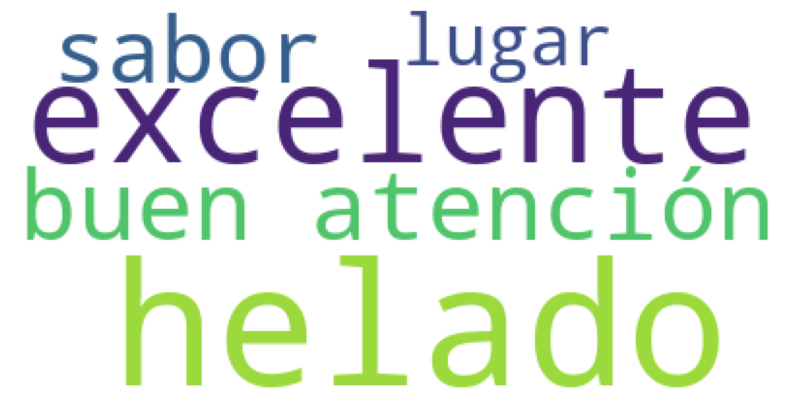

Que se destaca dentro de lo positivo


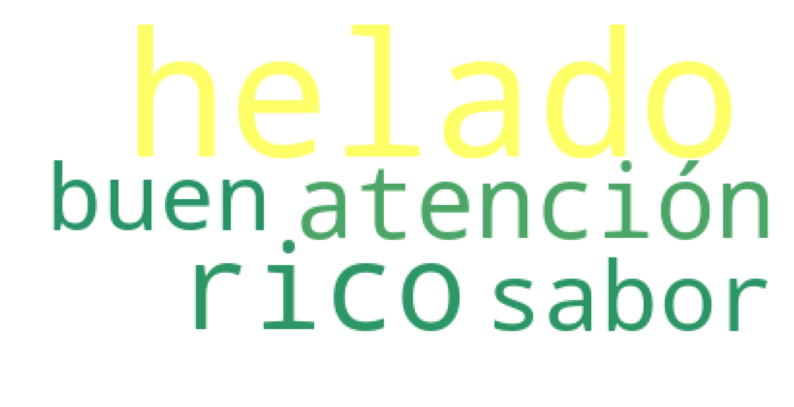

Que se destaca dentro de lo negativo


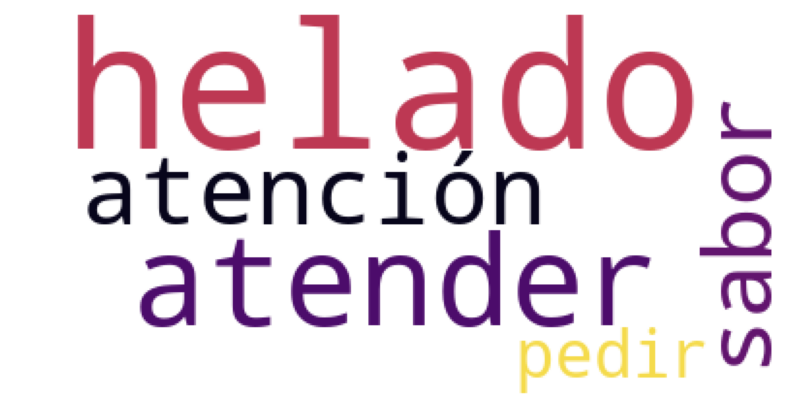

****************************************************************************************************
MARCA:  Casseratto
Opiniones Comunes


C:\Users\juans\AppData\Local\Temp\ipykernel_12020\3785809474.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Sentimiento"] = data["Sentimiento"].astype(int)


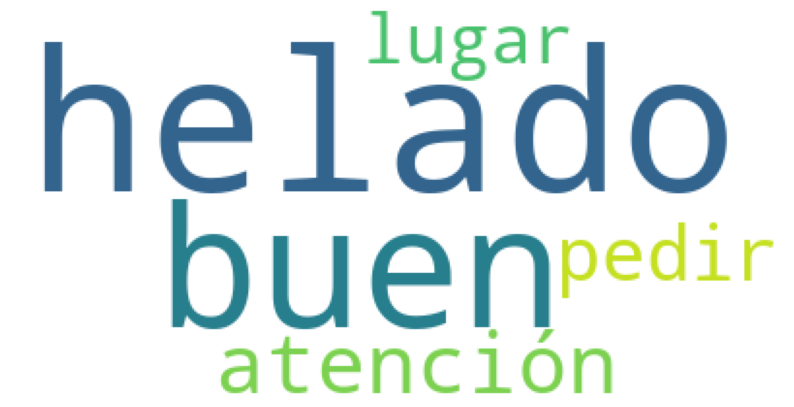

Que se destaca dentro de lo positivo


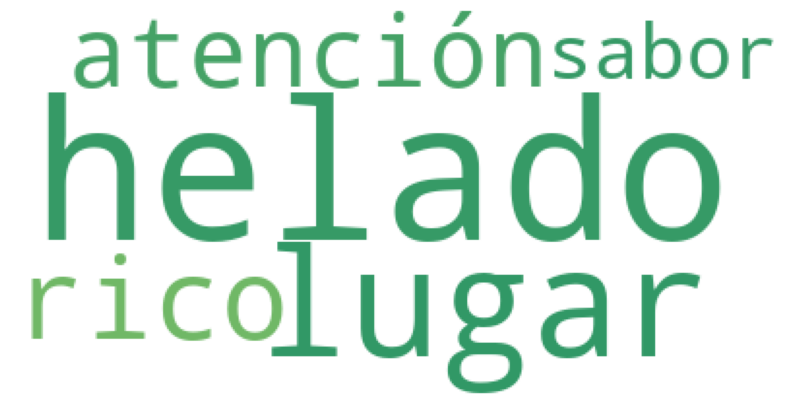

Que se destaca dentro de lo negativo


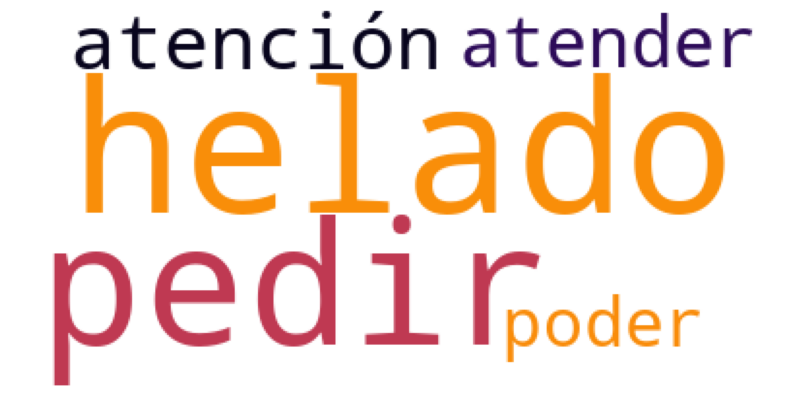

****************************************************************************************************
MARCA:  Chuii
Opiniones Comunes


C:\Users\juans\AppData\Local\Temp\ipykernel_12020\3785809474.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Sentimiento"] = data["Sentimiento"].astype(int)


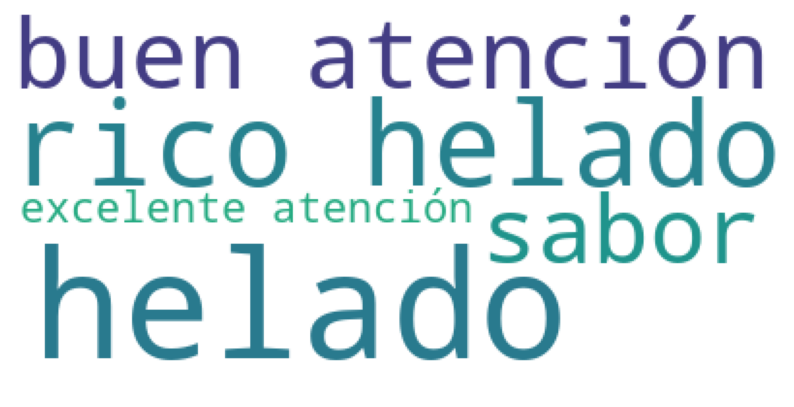

Que se destaca dentro de lo positivo


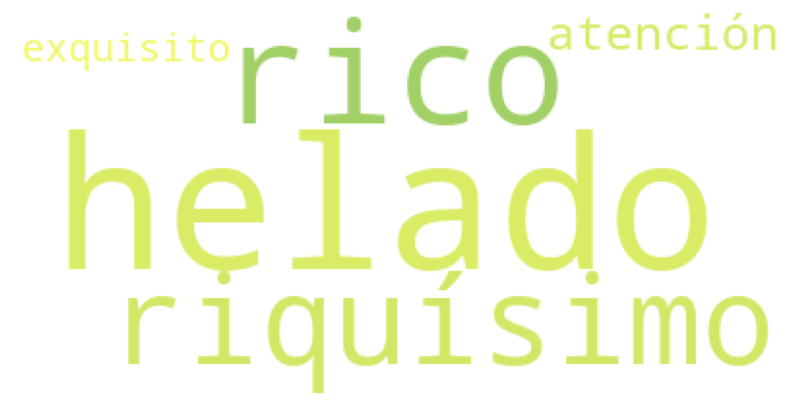

Que se destaca dentro de lo negativo


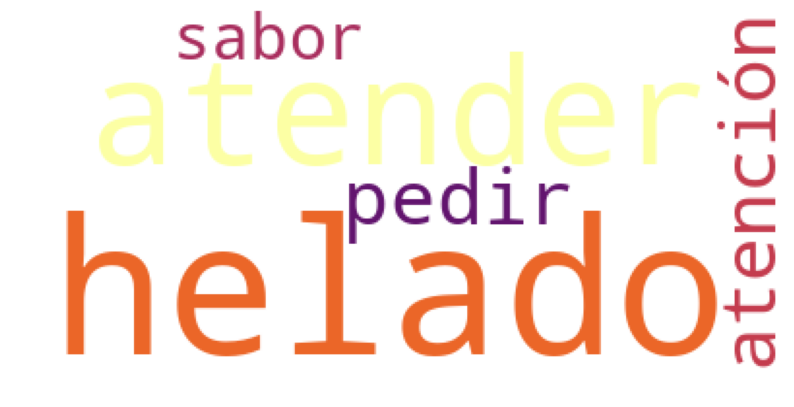

****************************************************************************************************
MARCA:  Cremolatti
Opiniones Comunes


C:\Users\juans\AppData\Local\Temp\ipykernel_12020\3785809474.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Sentimiento"] = data["Sentimiento"].astype(int)


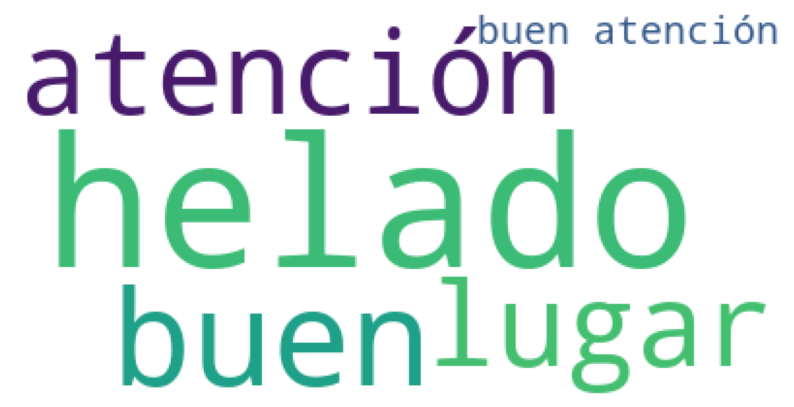

Que se destaca dentro de lo positivo


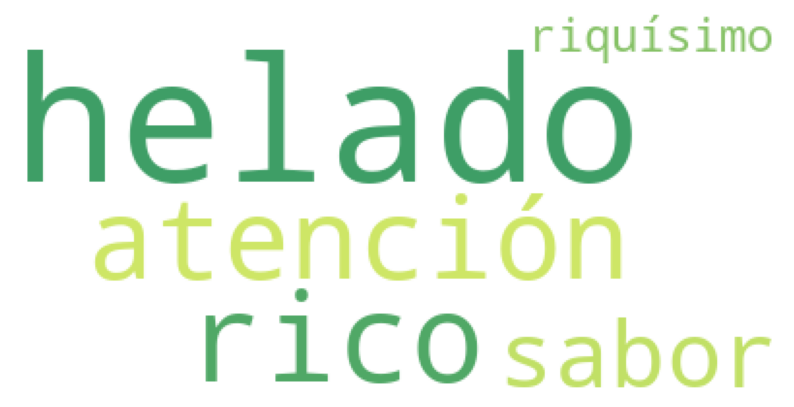

Que se destaca dentro de lo negativo


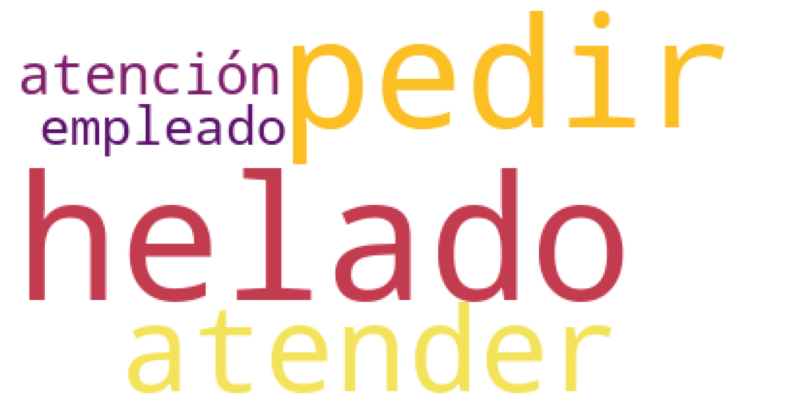

****************************************************************************************************
MARCA:  Del Bent
Opiniones Comunes


C:\Users\juans\AppData\Local\Temp\ipykernel_12020\3785809474.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Sentimiento"] = data["Sentimiento"].astype(int)


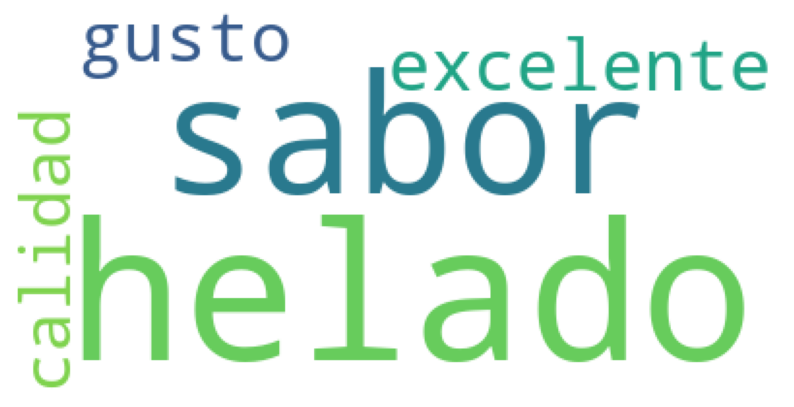

Que se destaca dentro de lo positivo


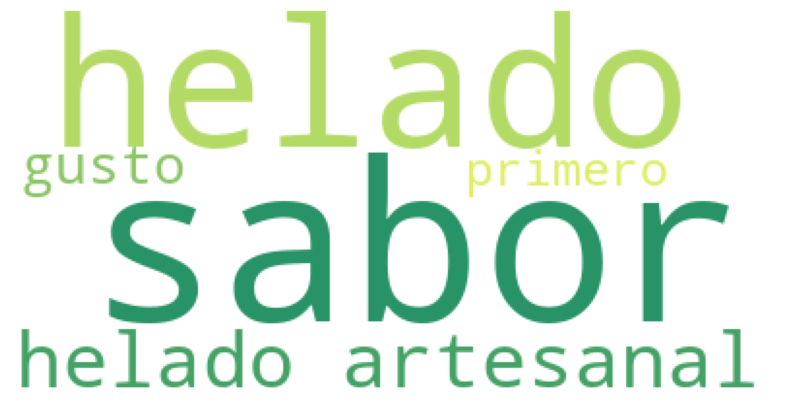

Que se destaca dentro de lo negativo


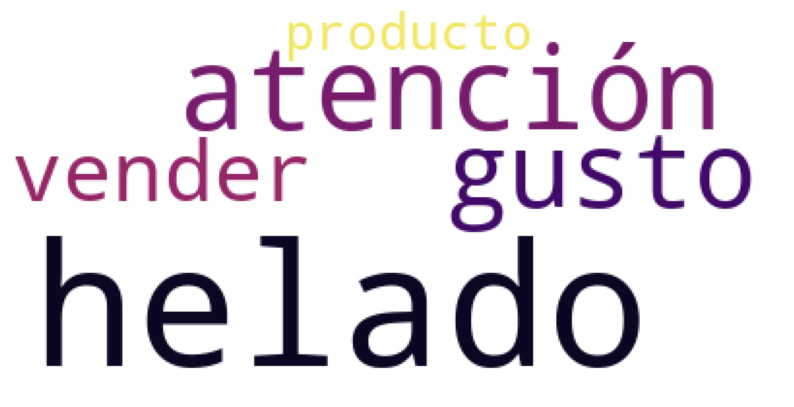

****************************************************************************************************
MARCA:  Di Pale
Opiniones Comunes


C:\Users\juans\AppData\Local\Temp\ipykernel_12020\3785809474.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Sentimiento"] = data["Sentimiento"].astype(int)


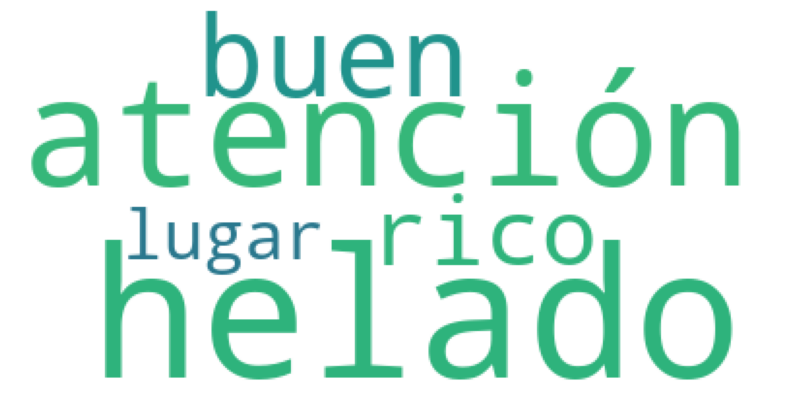

Que se destaca dentro de lo positivo


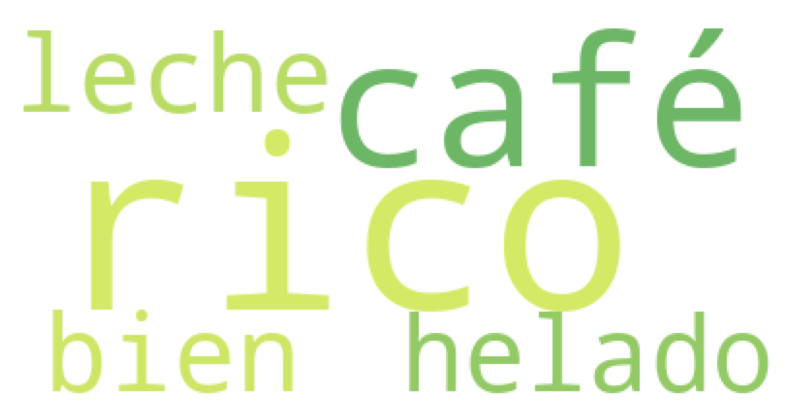

Que se destaca dentro de lo negativo


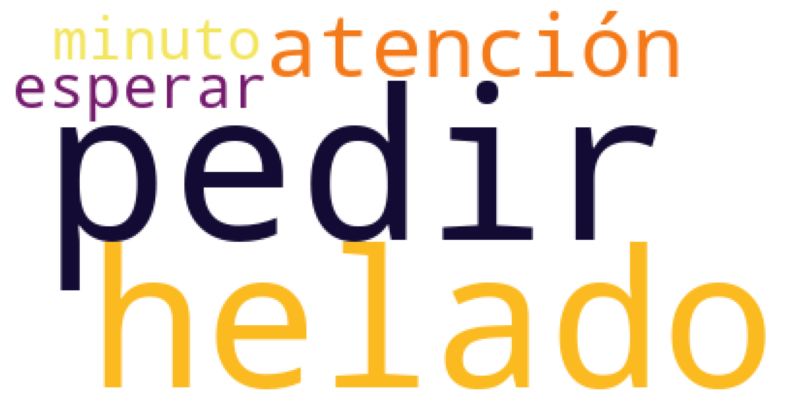

****************************************************************************************************
MARCA:  Famiglia
Opiniones Comunes


C:\Users\juans\AppData\Local\Temp\ipykernel_12020\3785809474.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Sentimiento"] = data["Sentimiento"].astype(int)


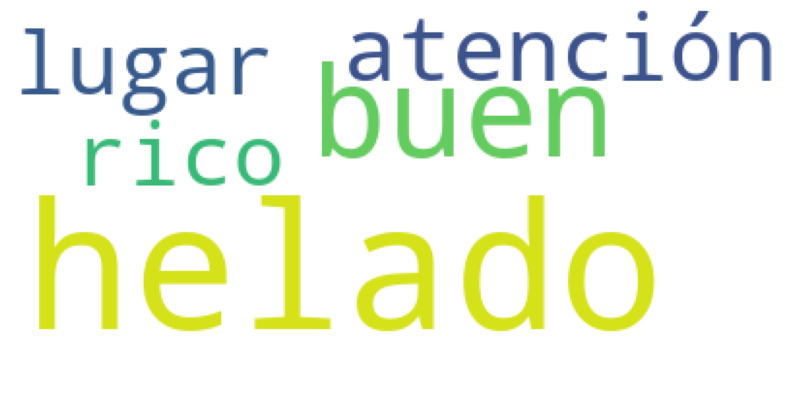

Que se destaca dentro de lo positivo


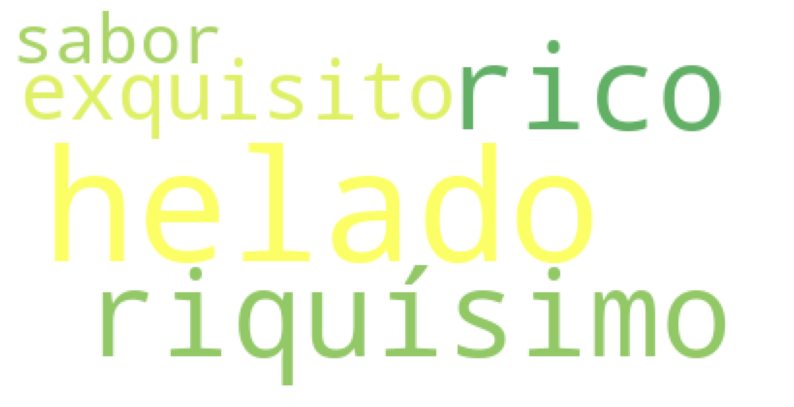

Que se destaca dentro de lo negativo


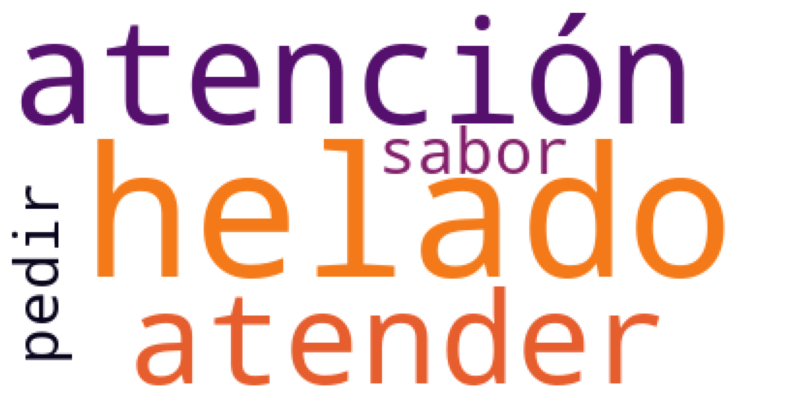

****************************************************************************************************
MARCA:  Gatelin
Opiniones Comunes


C:\Users\juans\AppData\Local\Temp\ipykernel_12020\3785809474.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Sentimiento"] = data["Sentimiento"].astype(int)


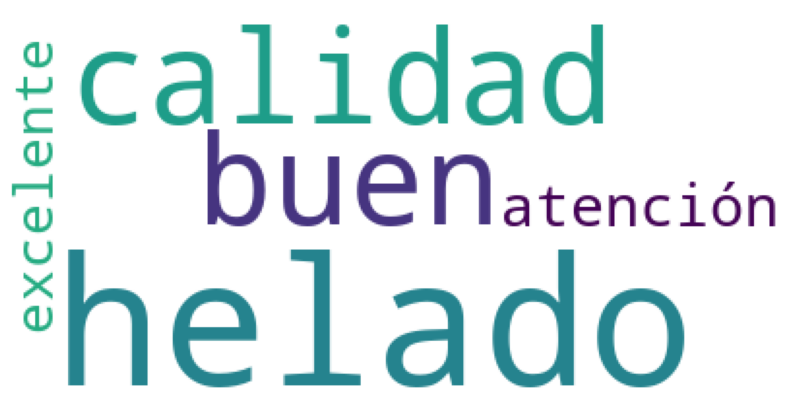

Que se destaca dentro de lo positivo


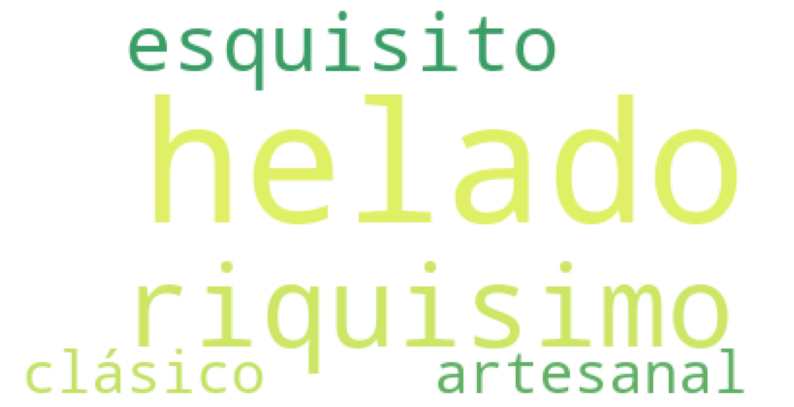

Que se destaca dentro de lo negativo


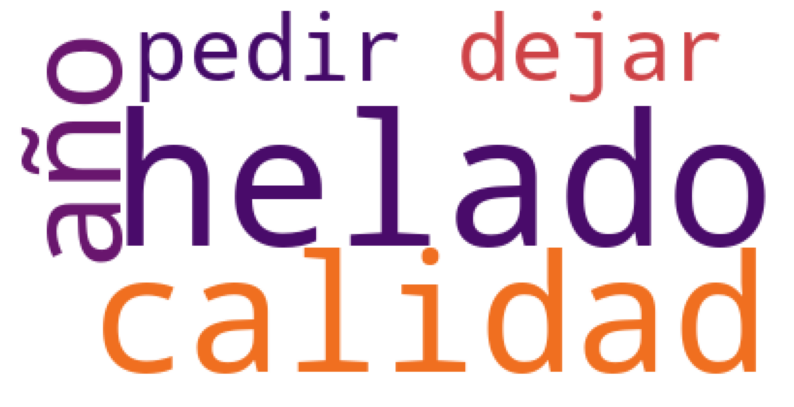

****************************************************************************************************
MARCA:  Leroma
Opiniones Comunes


C:\Users\juans\AppData\Local\Temp\ipykernel_12020\3785809474.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Sentimiento"] = data["Sentimiento"].astype(int)


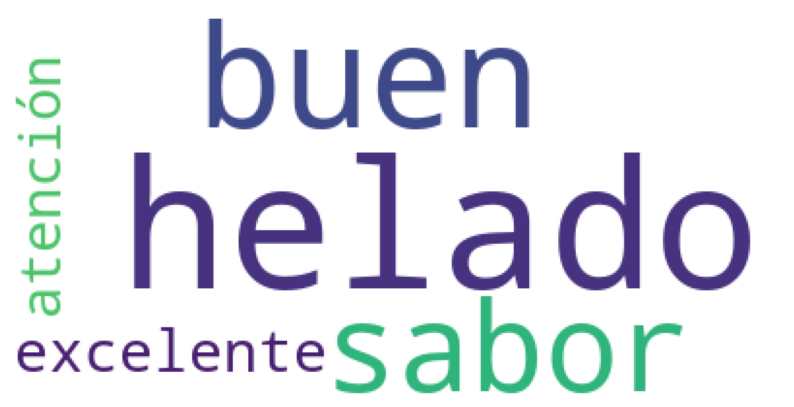

Que se destaca dentro de lo positivo


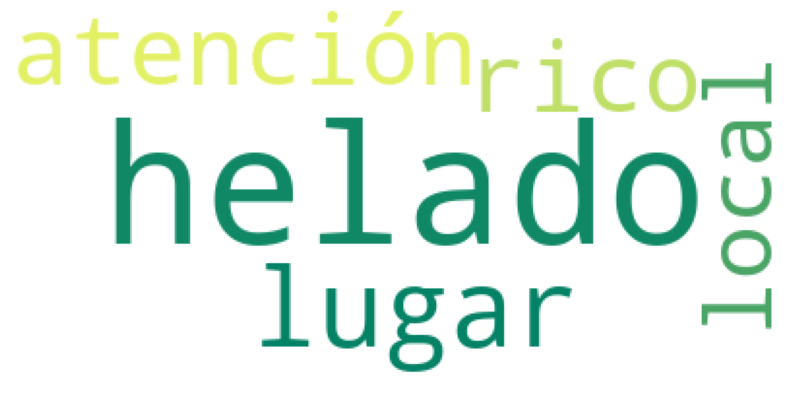

Que se destaca dentro de lo negativo


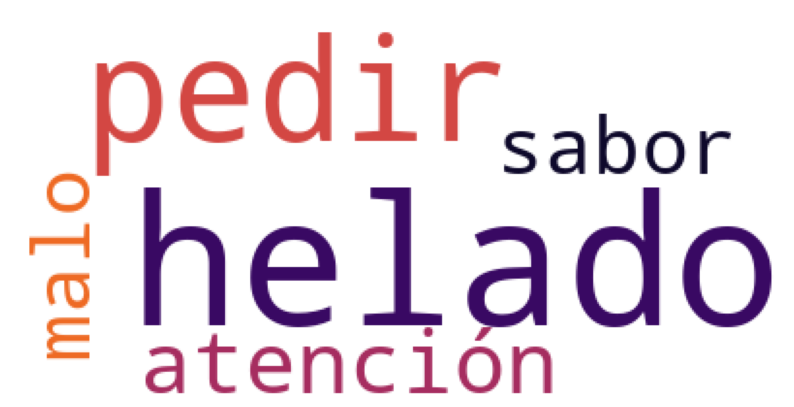

****************************************************************************************************
MARCA:  Lucciano's
Opiniones Comunes


C:\Users\juans\AppData\Local\Temp\ipykernel_12020\3785809474.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Sentimiento"] = data["Sentimiento"].astype(int)


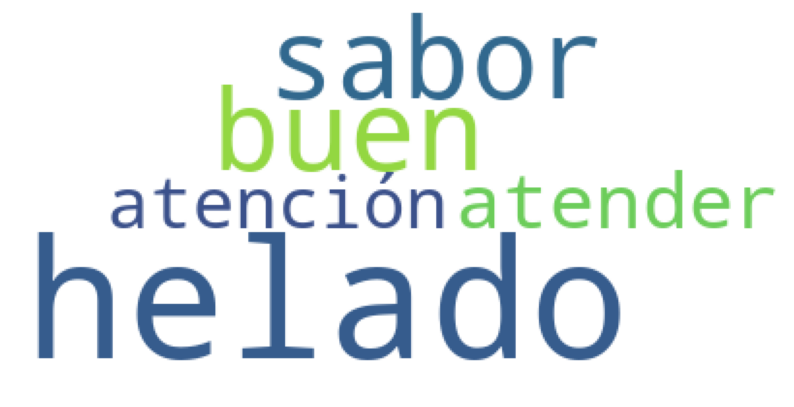

Que se destaca dentro de lo positivo


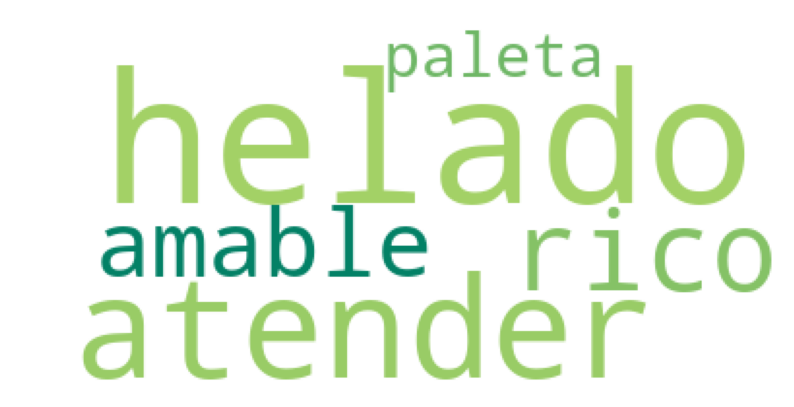

Que se destaca dentro de lo negativo


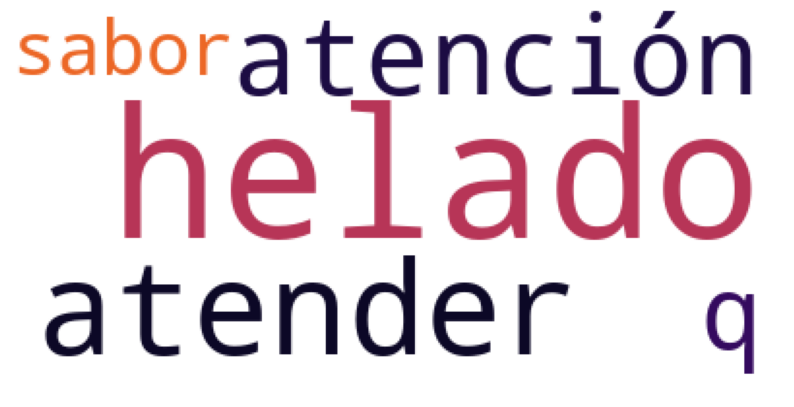

****************************************************************************************************
MARCA:  Melano
Opiniones Comunes


C:\Users\juans\AppData\Local\Temp\ipykernel_12020\3785809474.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Sentimiento"] = data["Sentimiento"].astype(int)


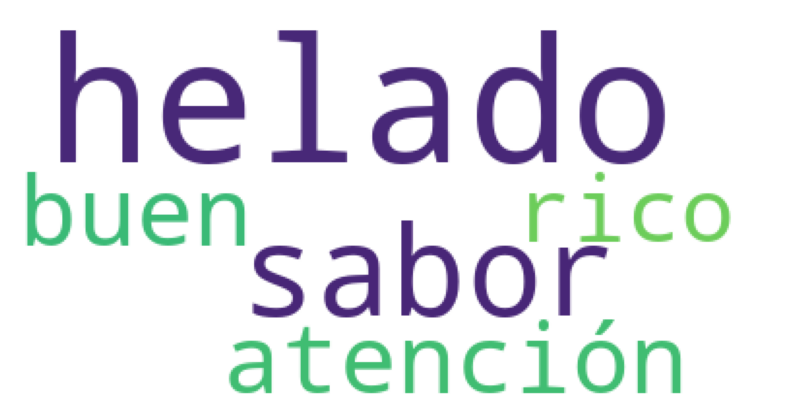

Que se destaca dentro de lo positivo


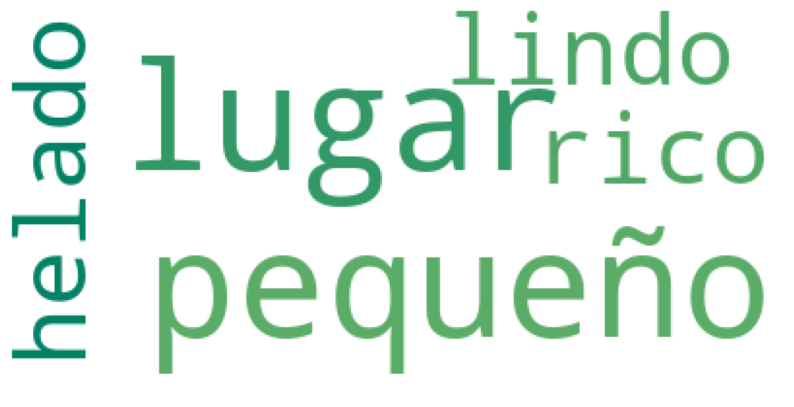

Que se destaca dentro de lo negativo


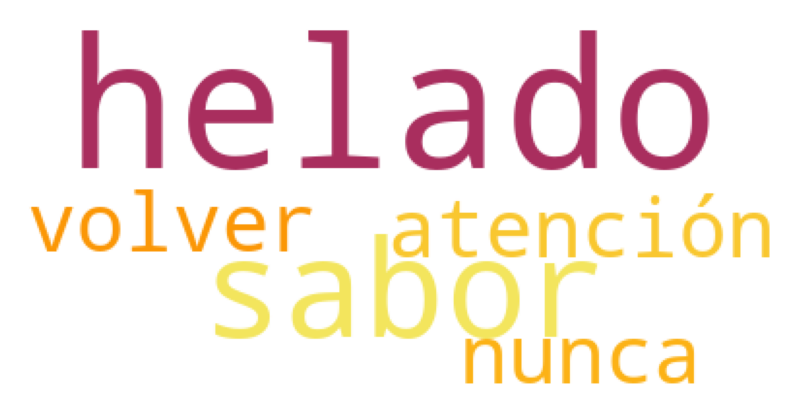

****************************************************************************************************
MARCA:  Rapanui
Opiniones Comunes


C:\Users\juans\AppData\Local\Temp\ipykernel_12020\3785809474.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Sentimiento"] = data["Sentimiento"].astype(int)


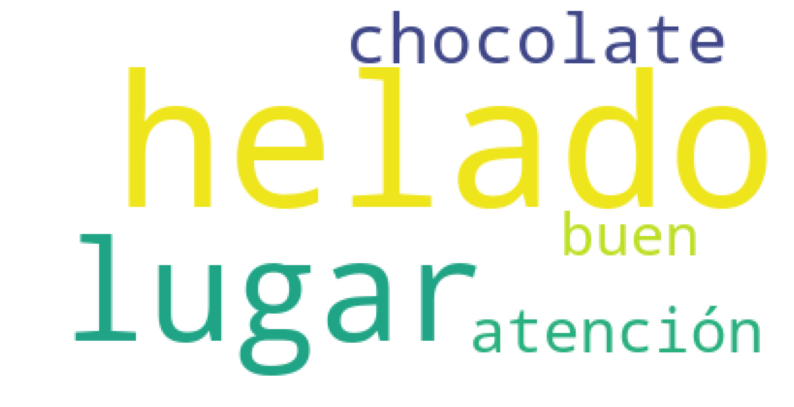

Que se destaca dentro de lo positivo


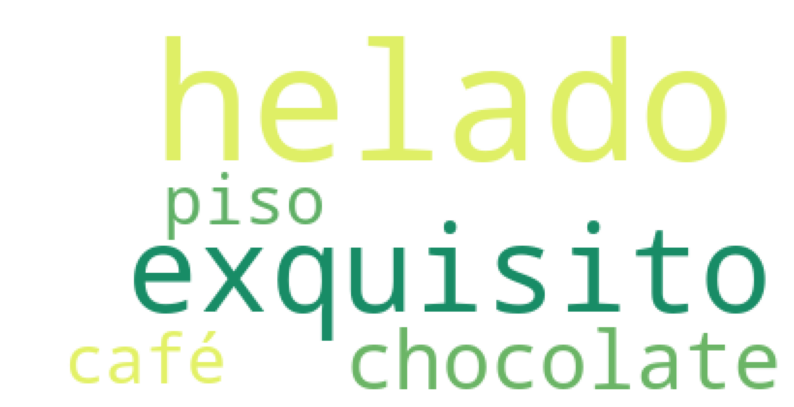

Que se destaca dentro de lo negativo


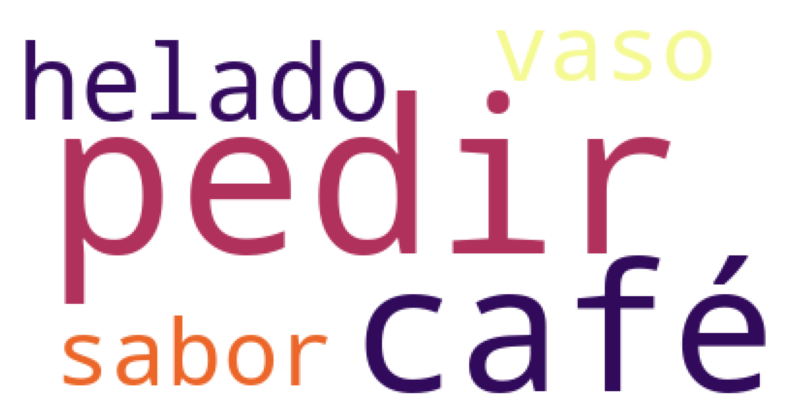

****************************************************************************************************


In [32]:
# Función para generar una nube de palabras para una marca específica
def clouder(df, marca, colormap):
    # Filtra el DataFrame por la marca seleccionada y toma solo la columna "Lematizer"
    data = df[df["Marca"] == marca].filter(["Lematizer"], axis=1)
    
    # Convierte strings que representan listas en listas reales, manejando valores nulos
    data["Lematizer"] = data["Lematizer"].apply(
        lambda x: ast.literal_eval(x) if pd.notna(x) else x
    )
    
    # Aplana todas las listas de palabras en una sola lista, excluyendo None
    text = [word for row in data["Lematizer"] if row is not None for word in row]
    # Une todas las palabras en un solo string separado por espacios
    txt = " ".join(text)

    # Crea la nube de palabras con parámetros personalizados
    wc = WordCloud(
        background_color="#FFFFFF",  # Fondo blanco
        contour_width=2,            # Grosor del contorno
        contour_color="#FFFFFF",    # Color del contorno blanco
        colormap=colormap,          # Mapa de colores especificado
        max_words=5,               # Máximo de palabras a mostrar
        stopwords=["si", "dar", "comprar", "mal", "decir", "mejor", "hacer", "siempre", "dos", "ir", "hs"],  # Palabras a ignorar
    ).generate(txt)  # Genera la nube a partir del texto
    
    # Configura y muestra la visualización
    plt.figure(figsize=(10, 10))  # Tamaño de la figura
    plt.axis("off")              # Oculta los ejes
    plt.imshow(wc)              # Muestra la nube de palabras
    plt.show()                  # Renderiza la visualización

# Función para filtrar y analizar opiniones por rating y sentimiento
def filter_by_rating(df, marca):
    # Excluye opiniones neutrales
    data = df[df["Sentimiento"] != "Neutral"]
    # Convierte la columna Sentimiento a tipo entero (0=negativo, 1=positivo)
    data["Sentimiento"] = data["Sentimiento"].astype(int)
    
    # Filtra opiniones positivas (rating alto y sentimiento positivo)
    data_pos = data[(data["Rating"] >= 4) & (data["Sentimiento"] == 1)]
    # Filtra opiniones negativas (rating bajo y sentimiento negativo)
    data_neg = data[(data["Rating"] <= 2) & (data["Sentimiento"] == 0)]

    # Muestra nube de palabras para todas las opiniones no neutrales
    print("Opiniones Comunes")
    clouder(data, marca, "viridis")
    
    # Muestra nube de palabras para opiniones positivas
    print("Que se destaca dentro de lo positivo")
    clouder(data_pos, marca, "summer")

    # Muestra nube de palabras para opiniones negativas
    print("Que se destaca dentro de lo negativo")
    clouder(data_neg, marca, "inferno")

# Obtiene lista de marcas únicas del DataFrame
list_brands = df.Marca.unique()

# Itera sobre cada marca para generar sus análisis
for i in list_brands:
    print("MARCA: ", i)          # Imprime el nombre de la marca
    filter_by_rating(df, i)      # Ejecuta el análisis para esa marca
    print("*" * 100)            # Separador visual entre marcas